<a href="https://colab.research.google.com/github/viethung52/AI/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot        as plt
from matplotlib.image           import imread
from os                         import listdir
from numpy                      import asarray
from numpy                      import save
from keras.preprocessing.image  import load_img, img_to_array
from keras.models               import Sequential
from keras.layers               import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot        as plt
from tensorflow.keras.utils     import load_img, img_to_array
from tensorflow.keras.optimizers  import SGD
import numpy                    as np

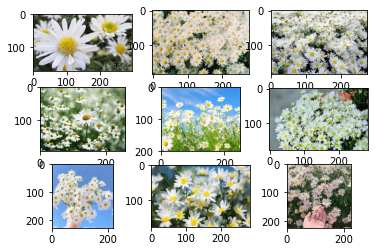

In [2]:
folder= '/content/drive/MyDrive/AI/Flower/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'hoacuc'+ str(i) +'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()
folder = '/content/drive/MyDrive/AI/Flower/'

photos, labels = list(), list()

In [3]:
for file in listdir(folder):
  if file.startswith('hoacuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoathuocduoc'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoamattroi'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoavantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

In [4]:
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('Fruits_photos.npy', photos)
save('Fruits_labels.npy', labels)

(80, 150, 150, 3) (80,)


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))

In [8]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=20, verbose=1)
model.save('flower.h5')

Epoch 1/20
2/2 [==============================] - 13s 332ms/step - loss: 170.2458 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 19ms/step - loss: 173.5927 - accuracy: 0.0375
Epoch 3/20
2/2 [==============================] - 0s 16ms/step - loss: 56.2569 - accuracy: 0.2250
Epoch 4/20
2/2 [==============================] - 0s 19ms/step - loss: 40.0805 - accuracy: 0.2125
Epoch 5/20
2/2 [==============================] - 0s 18ms/step - loss: 16.5590 - accuracy: 0.2125
Epoch 6/20
2/2 [==============================] - 0s 18ms/step - loss: 5.1264 - accuracy: 0.2875
Epoch 7/20
2/2 [==============================] - 0s 17ms/step - loss: 3.4579 - accuracy: 0.3000
Epoch 8/20
2/2 [==============================] - 0s 18ms/step - loss: 5.2687 - accuracy: 0.2125
Epoch 9/20
2/2 [==============================] - 0s 19ms/step - loss: 2.9353 - accuracy: 0.4250
Epoch 10/20
2/2 [==============================] - 0s 18ms/step - loss: 1.5292 - accuracy: 0.5750
Epoch 11/20
2/2 

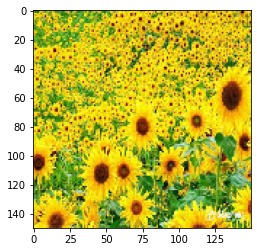

In [9]:
classes = ["hoacuc","hoathuocduoc","hoamattroi","hoavantho"]
img = load_img('/content/drive/MyDrive/AI/Flower/hoamattroi6.jpg', target_size=(150,150))
plt.imshow(img)

In [11]:
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.06759731 0.069063   0.07199319 0.0706425  0.06083261 0.0630031
  0.0557663  0.05798978 0.05787569 0.05968951 0.06396098 0.05905876
  0.06122346 0.06014387 0.06039093 0.06076896]]


'hoamattroi'

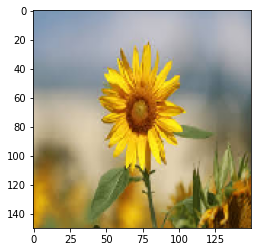

In [13]:
img = load_img('/content/drive/MyDrive/AI/hoamattroi.jpg', target_size=(150,150))
plt.imshow(img)

In [14]:
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.06770801 0.06836691 0.07004575 0.06757774 0.06063728 0.06261881
  0.05624029 0.05888866 0.0577547  0.06157496 0.06427511 0.05912968
  0.06156765 0.06129052 0.06220935 0.06011457]]


'hoamattroi'